# 장애인콜택시 대기시간 예측
## 단계2. 탐색적 데이터 분석

## 0.미션

* 1.개별 변수 분석하기
    * 앞서 생성된 각 변수들 특히 추가로 생성한 변수들에 대해서 단변량 분석을 수행합니다. 
    * 시각화 : Histogram, Boxplot, Barplot
    * 통계량 : 기초 통계량.
    * [옵션] 날짜 요소 관점을 추가해서 EDA 를 수행하시오.
* 2.Features와 Target의 관계 분석하기
    * Target은 숫자입니다.
    * 숫자형 feature들과 Target 과의 관계
        * 한꺼번에 상관관계를 확인하는 방법을 이용하여 분석합시다.
    * 범주형 feature들과 Target
        * sns.barplot, t-검정, 분산분석 등을 이용하여 분석합니다.
    * Target과 관련이 높은 feature와 그렇지 않은 feature를 정리해 봅시다.

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

### (2) 라이브러리 설치 및 불러오기

#### 1) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.

### (3) 데이터 불러오기
* **세부 요구사항**
    - 전처리 단계에서 저장한 파일을 불러옵니다. data1.pkl

In [2]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data = joblib.load('data1.pkl')

In [3]:
data.isna().sum()

date                      0
drive                     0
call_num                  0
ride_num                  0
waiting_time              0
fee                       0
dis                       0
weekday                   0
day                       0
month                     0
year                      0
temp_max                  1
temp_min                  1
rain(mm)                  1
humidity_max(%)           1
humidity_min(%)           1
sunshine(MJ/m2)           1
season                    0
holiday                   0
7_day_avg_waiting_time    6
ride_num/call_num         0
dtype: int64

In [4]:
na_col = ['temp_max', 'temp_min', 'rain(mm)', 'humidity_max(%)', 'humidity_min(%)', 'sunshine(MJ/m2)', '7_day_avg_waiting_time']
data[na_col] = data[na_col].fillna(0)

In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.tail()

,date,drive,call_num,ride_num,waiting_time,fee,dis,weekday,day,month,...,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),season,holiday,7_day_avg_waiting_time,ride_num/call_num
2918,2022-12-27,669,5635,4654,44.4,2198,8178,화,27,12,...,-0.3,-5.4,0.1,92.0,40.0,10.86,Winter,0.0,42.771429,82.590949
2919,2022-12-28,607,5654,4648,44.8,2161,7882,수,28,12,...,1.7,-7.8,0.0,71.0,34.0,10.88,Winter,0.0,43.514286,82.207287
2920,2022-12-29,581,5250,4247,52.5,2229,8433,목,29,12,...,2.1,-4.0,0.0,87.0,38.0,10.84,Winter,0.0,42.957143,80.895238
2921,2022-12-30,600,5293,4200,38.3,2183,8155,금,30,12,...,-4.4,-4.4,0.0,66.0,66.0,0.00,Winter,0.0,41.042857,79.350085
2922,2022-12-31,263,2167,1806,33.7,2318,9435,토,31,12,...,0.0,0.0,0.0,0.0,0.0,0.00,Winter,0.0,41.657143,83.341024


In [6]:
data.columns
target = 'waiting_time'

## 2.EDA : 1단계 - 개별 정보 분석하기

* **세부요구사항**
    * 의미 있는 변수들을 7개 이상 선정하고 단변량분석을 수행합니다. 
    * [옵션] 각 변수에 대한 탐색시, 요일별, 월별, 연도별로 나눠서도 확인해보세요.
    * 단변량 분석을 위한 코드를 함수로 작성하고 수행하세요.

### (1) 단변량 분석 함수 작성
* **세부요구사항**
    * 코드가 반복되므로, 시각화와 기초통계량을 한꺼번에 처리하는 함수를 생성합시다.
    * 포함되어야 할 내용 : 
        * 기초통계량
            * 숫자 : .describe()
            * 범주 : 범주별 빈도수/비율
        * 시각화


In [7]:
# 숫자형 변수 분석
def eda_1_n(data, var, hue_var = ''):
    display(data[[var]].describe().T)

    if hue_var == '' :
        plt.figure(figsize = (8,6))
        plt.subplot(2,1,1)
        sns.histplot(data[var], kde = True, bins = 50)
        plt.grid()

        plt.subplot(2,1,2)
        sns.boxplot(x = data[var])
        plt.grid()
        plt.show()
    else :
        plt.figure(figsize = (8,6))
        plt.subplot(1,2,1)
        sns.kdeplot(x= var, data = data, hue = hue_var)
        plt.grid()

        plt.subplot(1,2,2)
        sns.boxplot(x = hue_var, y = var, data = data)
        plt.grid()


In [8]:
# 범주형 변수 분석
def eda_1_c(data, var, hue_var = ''):

    cnt = data[var].value_counts()
    prop = data[var].value_counts()/data.shape[0]
    result = pd.DataFrame({'Count':cnt, 'Prop':prop})
    display(result)

    sns.countplot(x = var, data = data)
    plt.grid()
    plt.show()

### (2) 숫자형 변수
* 이제 숫자형 변수들에 대해서 단변량 분석을 수행합니다.

#### 1) 접수건

,count,mean,std,min,25%,50%,75%,max
call_num,2923.0,3924.83818,1510.056733,527.0,2161.0,4720.0,5110.0,6182.0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


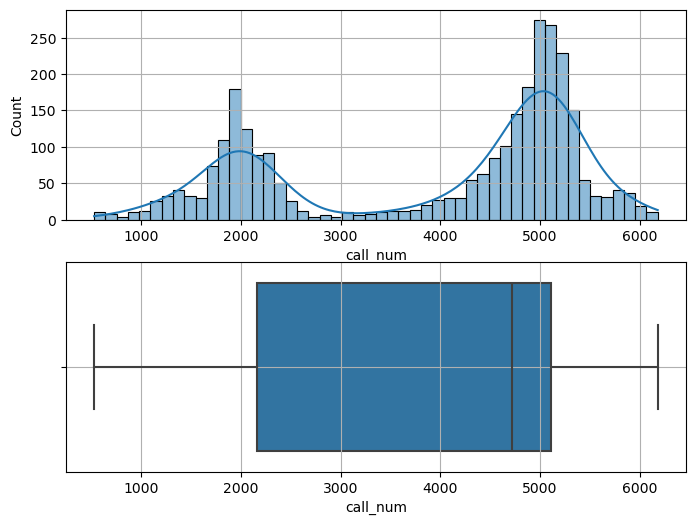

In [9]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
eda_1_n(data, 'call_num')

#### 2) 평균대기시간

,count,mean,std,min,25%,50%,75%,max
waiting_time,2923.0,40.300171,14.099285,17.2,29.6,38.2,48.6,96.1


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


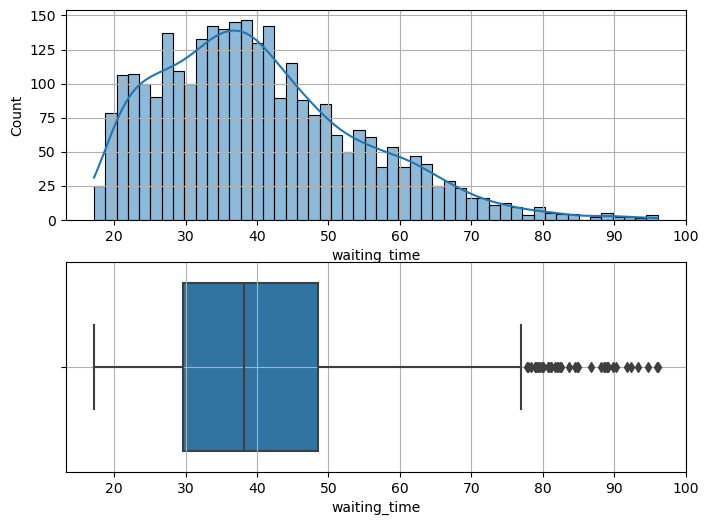

In [10]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
eda_1_n(data, 'waiting_time')

#### 3) 평균운임

,count,mean,std,min,25%,50%,75%,max
fee,2923.0,2304.362299,107.351769,2131.0,2228.0,2257.0,2401.0,2733.0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


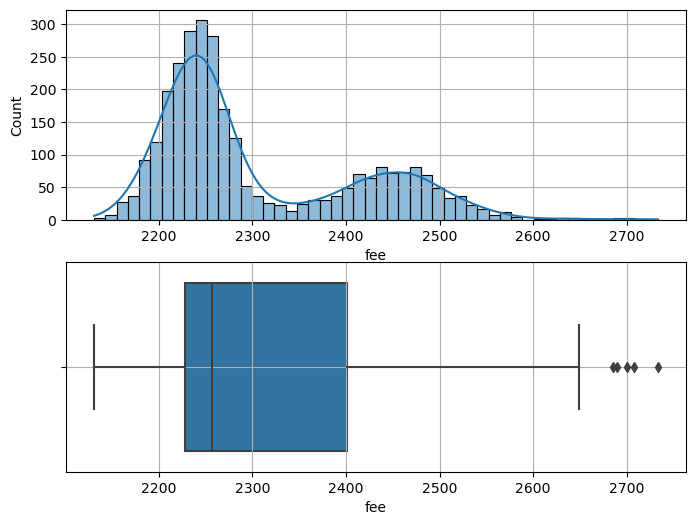

In [11]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
eda_1_n(data, 'fee')

#### 4) 평균거리

,count,mean,std,min,25%,50%,75%,max
dis,2923.0,9254.353062,1020.066902,7672.0,8521.0,8822.0,10154.0,14136.0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


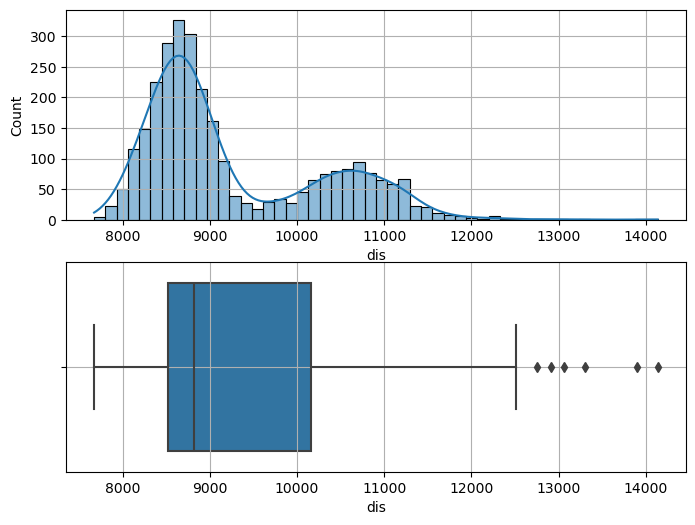

In [12]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
eda_1_n(data, 'dis')

#### 5) 탑승률

,count,mean,std,min,25%,50%,75%,max
ride_num/call_num,2923.0,84.156482,5.216705,59.699625,80.596425,84.55711,87.771823,96.884422


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


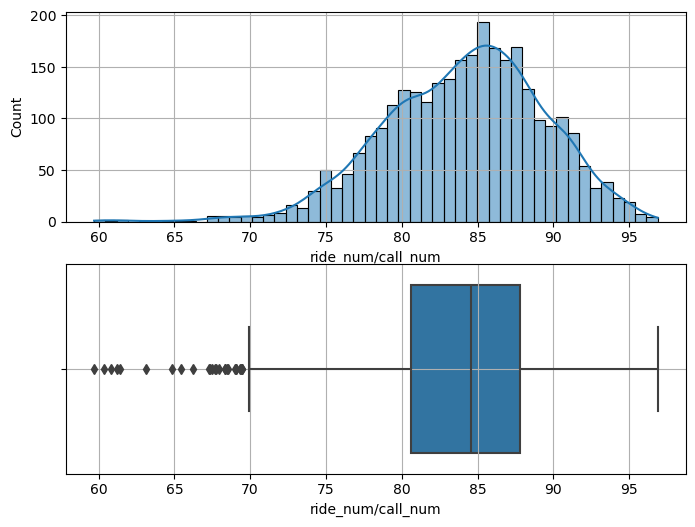

In [13]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
eda_1_n(data, 'ride_num/call_num')

#### 6) 최고기온(°C)

,count,mean,std,min,25%,50%,75%,max
temp_max,2923.0,18.073315,10.708812,-11.2,9.0,19.7,27.4,39.4


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


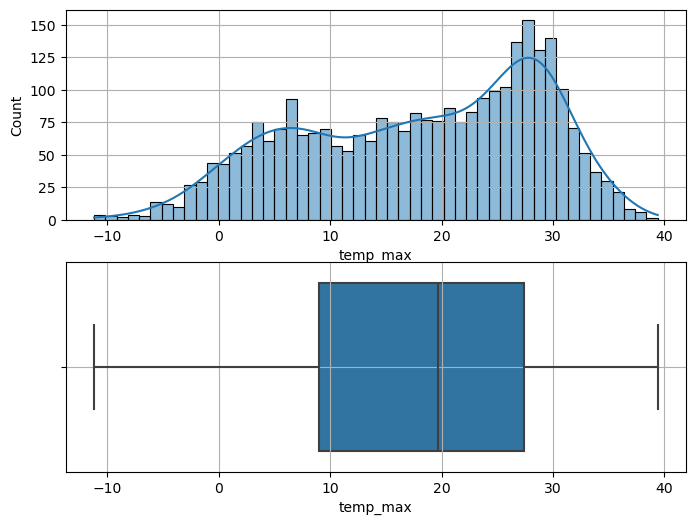

In [14]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
eda_1_n(data, 'temp_max')

#### 7) 일강수량(mm)

,count,mean,std,min,25%,50%,75%,max
rain(mm),2923.0,3.354465,12.593801,0.0,0.0,0.0,0.3,178.9


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


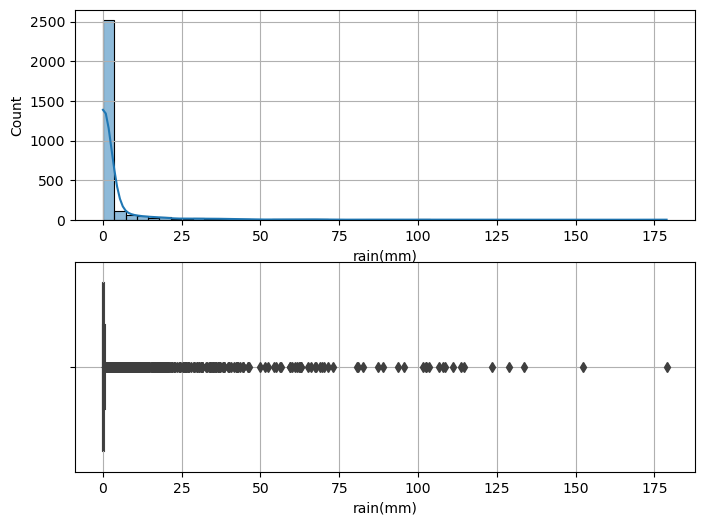

In [15]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
eda_1_n(data, 'rain(mm)')

### (3) 범주형 변수
* 범주형 변수들에 대해서 단변량 분석을 수행합니다.

#### 1) 공휴일 유무

,Count,Prop
holiday,,
0.0,2803,0.958946
1.0,120,0.041054


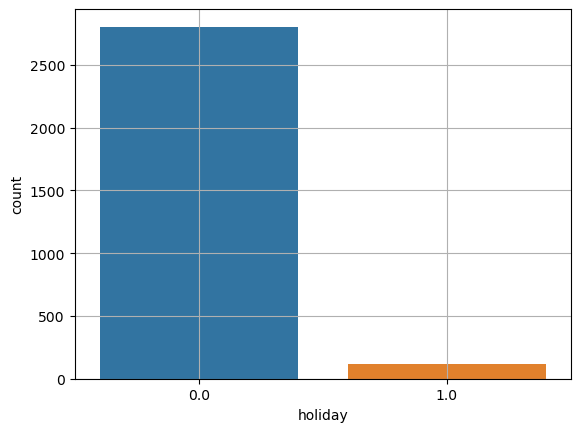

In [16]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
eda_1_c(data, 'holiday')

## 3.EDA 2단계 - feature와 target 비교 분석하기

* **세부요구사항**
    * 숫자 feature --> target
        * 전체 상관계수 구하고 시각화(heatmap)해서 파악해봅시다.
        * 상위 n개의 feature와 target의 상점도를 확인해봅시다.
    * 범주 feature --> target
        * 시각화 : 평균 비교 barplot
        * 수치화 : t-test, anova
    * 이번 단계에서는 함수 생성은 선택사항 입니다.

### (1) 숫자 feature --> Target
* 전체 상관계수 시각화(heatmap)
* 상위 n개 산점도 그리기

#### 1) 전체 상관계수 시각화

In [17]:
# 전체 상관관계를 한눈에 보여주기 함수
def eda_2_corr(data, num_vars):

    temp = data.loc[:, num_vars]
    corr = temp.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))

    display(mask * corr)

    sns.set(style='white')
    plt.figure(figsize=(12, 12))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, annot = True)
    plt.show()

,date,drive,call_num,ride_num,waiting_time,fee,dis,month,year,day,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),holiday,7_day_avg_waiting_time,ride_num/call_num
date,1.0,0.25765,0.012408,0.008864,-0.088682,-0.101120,-0.211494,0.124544,0.992155,0.011759,0.011505,0.034288,0.056677,0.105838,0.194023,0.080679,-0.003482,-0.093783,0.028863
drive,0.0,1.00000,0.885944,0.904711,0.036265,-0.844599,-0.857587,0.131221,0.242936,0.029854,0.109039,0.109875,0.002735,0.051069,0.089014,0.077216,-0.259442,-0.062215,-0.028321
call_num,0.0,0.00000,1.000000,0.988760,0.292297,-0.850360,-0.847801,0.088752,0.000958,0.044061,0.058588,0.054497,-0.012693,-0.011497,0.000402,0.025190,-0.309029,0.190029,-0.251071
ride_num,0.0,0.00000,0.000000,1.000000,0.184828,-0.867966,-0.858673,0.059738,0.001081,0.038386,0.064919,0.058784,-0.015634,-0.005730,0.007243,0.041215,-0.313470,0.083725,-0.117402
waiting_time,-0.0,0.00000,0.000000,0.000000,1.000000,0.019276,-0.014135,0.282139,-0.125690,0.097162,0.040877,0.034409,-0.005593,-0.039265,-0.086399,-0.043734,-0.170337,0.839219,-0.769900
fee,-0.0,-0.00000,-0.000000,-0.000000,0.000000,1.000000,0.977614,0.051443,-0.108311,-0.005273,0.083840,0.070460,0.011255,0.019471,-0.035516,0.008753,0.300235,0.119675,0.007463
dis,-0.0,-0.00000,-0.000000,-0.000000,-0.000000,0.000000,1.000000,0.033975,-0.217333,-0.007846,0.087966,0.073510,0.004731,0.020096,-0.040163,-0.000774,0.320343,0.074288,0.047514
month,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.000030,0.010018,0.199671,0.230717,0.043670,0.148070,0.236298,-0.172247,-0.020946,0.332761,-0.204539
year,0.0,0.00000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,1.000000,0.000099,-0.013078,0.005925,0.051783,0.088334,0.165975,0.103406,0.000077,-0.137113,0.055125
day,0.0,0.00000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,1.000000,0.000417,0.004320,-0.007639,-0.013749,-0.002719,-0.017520,-0.095213,0.092529,-0.040728


/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


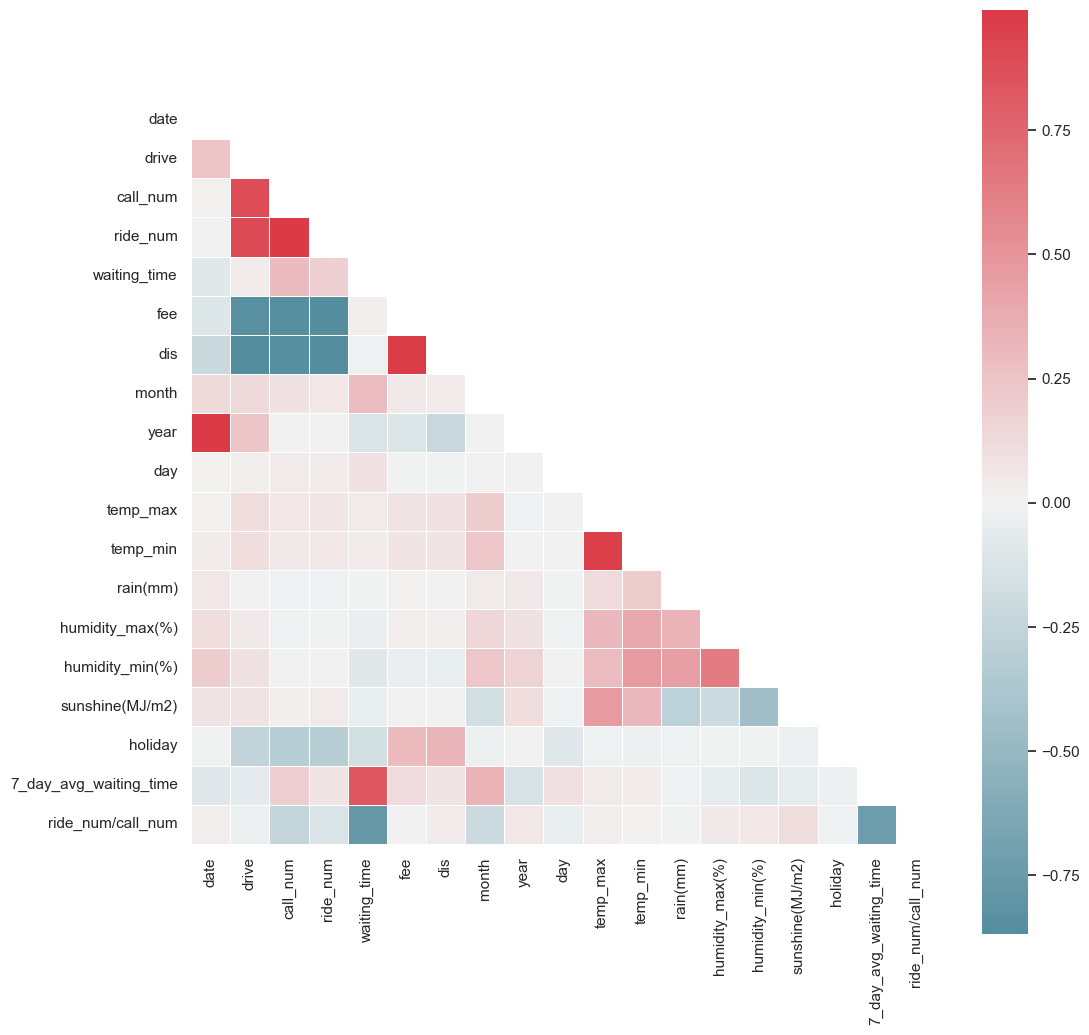

In [18]:
num_vars = ['date', 'drive', 'call_num', 'ride_num', 'waiting_time', 'fee', 'dis',
            'month', 'year', 'day', 'temp_max', 'temp_min', 'rain(mm)',
       'humidity_max(%)', 'humidity_min(%)', 'sunshine(MJ/m2)',
       'holiday', '7_day_avg_waiting_time', 'ride_num/call_num']
eda_2_corr(data, num_vars)

#### 2) 산점도

In [19]:
def eda_2_nn(data, target, var, hue = ''):
    from matplotlib import rc
    rc('font', family='AppleGothic')

    plt.figure(figsize = (8,8))
    if hue == '' :
        sns.scatterplot(x = var, y = target, data = data)
        plt.grid()

    if hue != '' :
        sns.scatterplot(x = var, y = target, data = data, hue = hue)
        plt.grid()

    plt.show()

* ride_rate

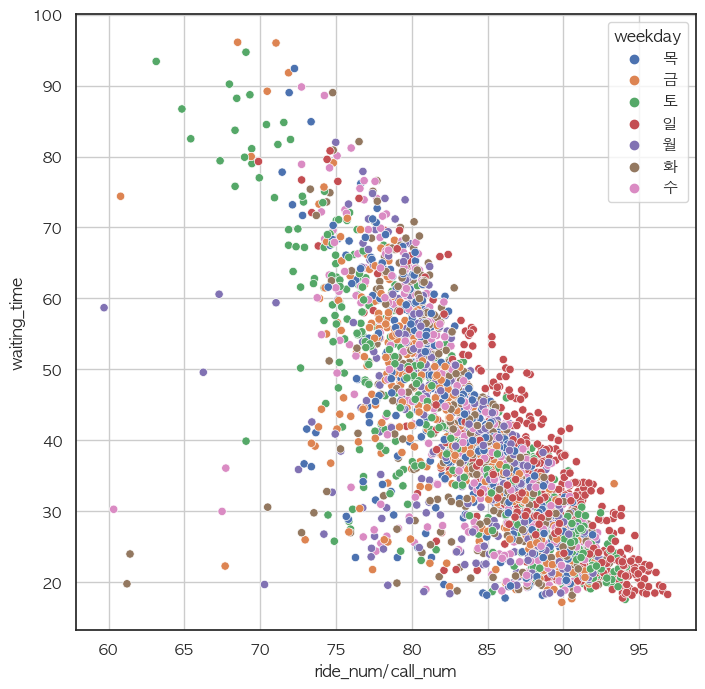

In [20]:
eda_2_nn(data, target, 'ride_num/call_num', 'weekday')

* fare

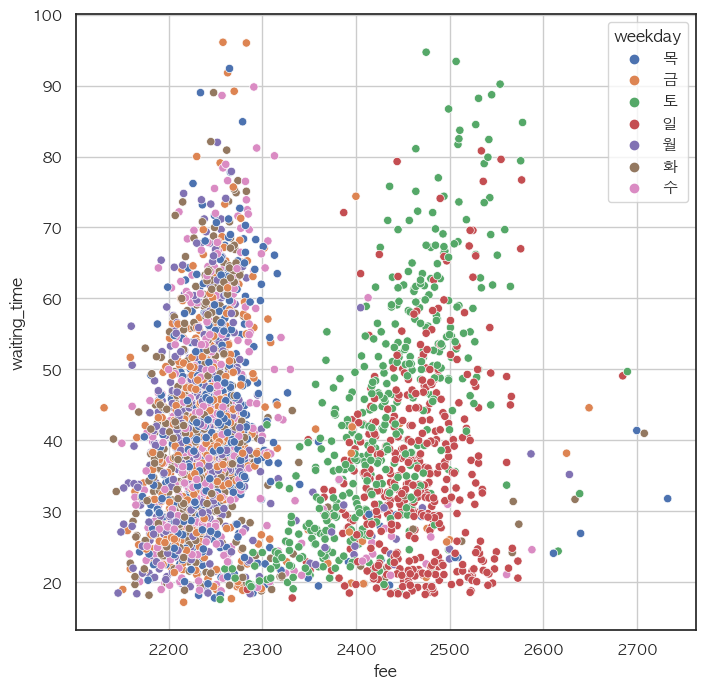

In [21]:
eda_2_nn(data, target, 'fee', 'weekday')

### (2) 범주 feature --> Target

* 범주형 변수들과 target 간의 관계를 살펴봅시다.
    * 시각화 : 평균비교 barplot
    * 수치화 : t-검정, anova

* 휴일 여부

In [22]:
# t-test
h0 = data.loc[data['holiday']==0, target]
h1 = data.loc[data['holiday']==1, target]
spst.ttest_ind(h0, h1)

TtestResult(statistic=9.34258937743362, pvalue=1.8079187961897196e-20, df=2921.0)

* 요일

In [23]:
# # anova
temp = data.loc[data['weekday'].notnull()]

w0 = temp.loc[temp['weekday']=='월', target]
w1 = temp.loc[temp['weekday']=='화', target]
w2 = temp.loc[temp['weekday']=='수', target]
w3 = temp.loc[temp['weekday']=='목', target]
w4 = temp.loc[temp['weekday']=='금', target]
w5 = temp.loc[temp['weekday']=='토', target]
w6 = temp.loc[temp['weekday']=='일', target]

spst.f_oneway(w0,w1,w2,w3,w4,w5,w6)

F_onewayResult(statistic=15.66669048966133, pvalue=8.814291693785567e-18)

* 계절

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


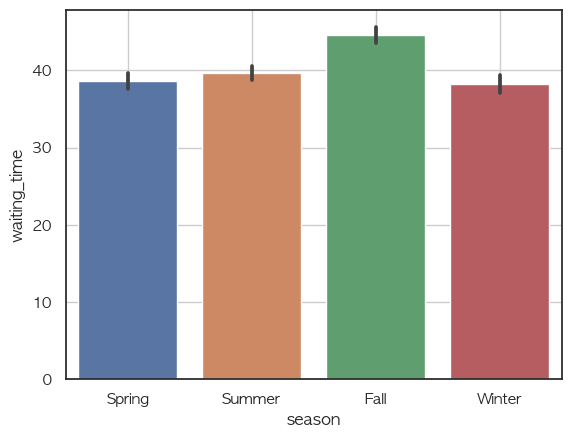

In [24]:
sns.barplot(x = 'season', y = target, data = data)
plt.grid()
plt.show()

In [25]:
# # anova
temp = data.loc[data['season'].notnull()]

s0 = temp.loc[temp['season']=='Spring', target]
s1 = temp.loc[temp['season']=='Summer', target]
s2 = temp.loc[temp['season']=='Fall', target]
s3 = temp.loc[temp['season']=='Winter', target]

spst.f_oneway(s0,s1,s2,s3)

F_onewayResult(statistic=32.43282248735729, pvalue=1.2875953782618546e-20)

## 4.변수 정리

* Target과 관련성이 높은 feature와 그렇지 않은 feature를 정리합니다.
* 여기서의 판단은 다소 주관적입니다. 조금 정확하지 않아도 괜찮습니다.
* 다음 단계 모델링에서 관련이 적은 변수는 포함시키거나, 제외를 고려할때 활용합니다.

* 강한 관계의 변수

In [26]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 타겟과 강한 관계를 보이는 것은 7일간 평균 대기 시간, 탑승률
# 휴일여부, 계절, 요일도 통계적으로 유의미해보이기는 함

* 중간(약한) 관계의 변수

In [27]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.


* (거의) 관계가 없는 변수

In [28]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.


## 5.데이터 저장

* **세부 요구사항**
    * 혹시 데이터에 변경이 발생할 수 있으니, 저장해 놓읍시다.
    * joblib.dump를 이용하시오.
    * 저장할 파일 이름 : data2.pkl

In [29]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
joblib.dump(data, 'data2.pkl')

['data2.pkl']